 0-th layer, shape : (1, 28, 28), input
 1-th layer, shape : (1, 28, 28), convolution
 2-th layer, shape : (1, 28, 28), activation
 3-th layer, shape : 10, affine
 4-th layer, shape : 10, activation
 5-th layer, shape : 10, output
Load MNIST data ........ Done.


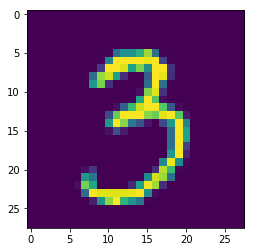

In [1]:
# Authors: Daichi Yoshikawa <daichi.yoshikawa@gmail.com>
# License: BSD 3 clause

from __future__ import absolute_import

import sys
sys.path.append('../../')

import matplotlib.pyplot as plt
import pickle
import numpy as np
import dnn
from dnn.neuralnet import NeuralNetwork
from dnn.utils.nn_utils import scale_normalization

from dnn.training.optimizer import AdaGrad, AdaDelta, RMSProp
from dnn.training.random_weight import RandomWeight
from dnn.training.loss_function import LossFunction

from dnn.layers.affine import AffineLayer
from dnn.layers.convolution import ConvolutionalLayer
from dnn.layers.activation import Activation, ActivationLayer
from dnn.layers.dropout import DropoutLayer
from dnn.layers.batch_norm import BatchNormLayer

def get_mnist():
    sys.stdout.write('Load MNIST data .')
    x = np.load('input1.npy')
    sys.stdout.write('.')
    x = np.r_[x, np.load('input2.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input3.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input4.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input5.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input6.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input7.npy')]
    x = x.astype(float)

    sys.stdout.write('.')
    y = np.load('output.npy')
    y = y.astype(float)

    sys.stdout.write(' Done.\n')

    return x, y

dtype = np.float32
model = NeuralNetwork(input_shape=(1, 28, 28), dtype=dtype)
model.add(ConvolutionalLayer(shape=(1, 28, 28), f_shape=(1, 3, 3)))
#model.add(AffineLayer(shape=(784, 400), random_weight=RandomWeight.Type.he))
model.add(ActivationLayer(activation=Activation.Type.srrelu))

model.add(AffineLayer(shape=(400, 10), random_weight=RandomWeight.Type.default))
model.add(ActivationLayer(activation=Activation.Type.softmax))
model.compile()

model.print_config()

x, y = get_mnist()
scale_normalization(x)

x = x.reshape(-1, 1, 28, 28)
plt.imshow(x[20000][0])
plt.show()

optimizer = AdaGrad(learning_rate=5e-2, weight_decay=1e-3, dtype=dtype)

"""
lc = model.fit(
        x=x,
        y=y,
        epochs=10,
        batch_size=100,
        optimizer=optimizer,
        loss_function=LossFunction.Type.multinomial_cross_entropy,
        learning_curve=True,
        shuffle=True,
        shuffle_per_epoch=True,
        test_data_ratio=0.142857 # Use 60,000 for training and 10,000 for test.
)

lc.plot(figsize=(8,10), fontsize=12)
model.show_filters(0, shape=(28, 28), layout=(10, 10), figsize=(12, 12))
"""
print('')